In [120]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib.patches import Rectangle

import seaborn as sns

matplotlib.style.use('fivethirtyeight')

# Pac-12 Leaderboard Visualizaions

In [121]:
pac12 = pd.read_csv("pac12_leaders.csv")
pac12.head()

,Player,Team,POS,AVG,OBP,SLG,OPS,GP,AB,R,H,2B,3b,HR,RBI,HP,BB,SO,SB,CS
0,Dylan Beavers,California,CF,0.303,0.401,0.630,1.031,55,211,44,64,11,2,18,49,5,32,53,10,2
1,Ethan Long,Arizona State,DH,0.340,0.408,0.725,1.133,48,153,40,52,11,0,16,53,7,14,44,0,0
2,Jacob Berry,Arizona,DH,0.371,0.463,0.710,1.173,55,210,48,78,16,5,15,64,9,31,48,2,2
3,Quentin Selma,California,3B,0.291,0.368,0.544,0.912,55,206,43,60,5,1,15,47,4,24,51,0,0
4,Kenyon Yovan,Oregon,DH,0.319,0.419,0.596,1.015,47,188,48,60,10,0,14,51,10,26,50,1,1


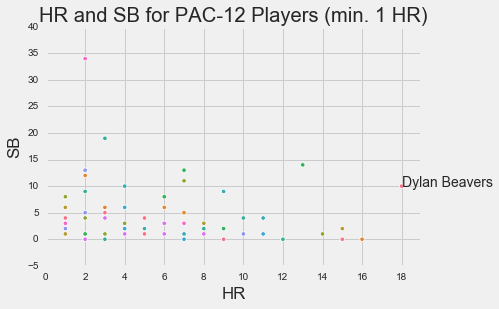

In [122]:
sns.scatterplot(data=pac12, x="HR", y="SB", hue="Team",legend=None)
plt.annotate("Dylan Beavers", (18, 10))
plt.xlim([0,19])
plt.style.use('fivethirtyeight')
plt.xticks([0,2, 4, 6, 8,10,12,14,16,18])
plt.title("HR and SB for PAC-12 Players (min. 1 HR)")

plt.show()

In [123]:
pac12_pitcher = pd.read_csv("pac12_pitchers.csv")
pac12_pitcher.head()

pac12_pitcher["K/9"] = (pac12_pitcher["SO"]/pac12_pitcher["IP"])*9
pac12_pitcher[["Player","Team","K/9"]].sort_values(by="K/9",ascending=False).head(5)

,Player,Team,K/9
7,Kevin Abel,Oregon State,12.075949
2,Josh White,California,11.931260
4,Brendan Beck,Stanford,11.093023
10,Cooper Hjerpe,Oregon State,10.875000
5,Sean Mullen,UCLA,10.711354


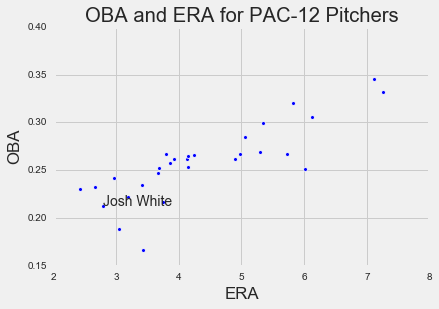

In [124]:
sns.scatterplot(data=pac12_pitcher, x="ERA", y="OBA", s=15,legend=None)
plt.annotate("Josh White", (2.79, 0.213))

plt.title("OBA and ERA for PAC-12 Pitchers")

plt.show()

# Trackman Data Cleaning

In [125]:
trackman = pd.read_csv('Trackman.csv')  

/Users/tylernunez/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [126]:
df = trackman[["Count","TaggedPitchType","AutoPitchType","PitcherTeam","Pitcher",'EffectiveVelo']]
df['TaggedPitchType'].replace('Undefined', np.NaN,inplace=True)
df.TaggedPitchType.fillna(df.AutoPitchType, inplace=True)
del df['AutoPitchType']

/Users/tylernunez/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/tylernunez/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [139]:
cleaned = pd.read_csv("cleanedTrackman.csv")
batter_cleaned = pd.read_csv("cleaned_hitters.csv")

In [128]:
# Check for NaN values in columns (891 total rows)
for col in df.columns:
  col_i = df[col]
  nan_rows = col_i[col_i.isna()]
  print('There are {} NaN values in the {} column'.format(len(nan_rows), col))

There are 0 NaN values in the Count column
There are 0 NaN values in the TaggedPitchType column
There are 0 NaN values in the PitcherTeam column
There are 0 NaN values in the Pitcher column
There are 4285 NaN values in the EffectiveVelo column


In [129]:
# Replacing NaN values in EffectiveVelo and SpinRate with average associated with Pitch Type
df.groupby(['TaggedPitchType']).mean()

,EffectiveVelo
TaggedPitchType,
ChangeUp,79.397572
Curveball,74.709215
Cutter,83.692053
Fastball,87.916834
Knuckleball,61.873290
Other,75.522969
Sinker,86.721276
Slider,77.875216
Splitter,79.877514


In [130]:
df['EffectiveVelo'].fillna(df.groupby(["TaggedPitchType"])["EffectiveVelo"].transform(np.mean), inplace=True)

# Percentile Rank of Fastball Velocity

In [131]:
df_fb = df[df["TaggedPitchType"] == "Fastball"]
avg_all_pitchers = df_fb.groupby(['Pitcher',"PitcherTeam"]).mean()
avg_all_pitchers['Rank'] = avg_all_pitchers['EffectiveVelo'].rank(method='dense', ascending=True, pct=True)
avg_all_pitchers = avg_all_pitchers.reset_index(level="PitcherTeam")
avg_all_pitchers["Rank"] = avg_all_pitchers["Rank"] * 100

avg_all_pitchers.sample(20)

,PitcherTeam,EffectiveVelo,Rank
Pitcher,,,
"Stillman, Josh",ALA_LIO,82.234888,12.794503
"Sachse, Austin",SOU_RED,82.937746,16.982984
"Longsworth, Landon",ULM_WAR,88.202982,68.520942
"Ksiazek, Tyler",MON_HAW,85.713440,38.776178
"Calderon, Alexis",MAN_JAS,86.873303,53.304974
"Hill, Jaden",LSU_TIG,92.117648,96.302356
"Morrow, Cody",UAH_C,90.932411,91.557592
"DiMartino, Anthony",GBC_LIG,82.278646,12.892670
"Swanson, Kyle",NOR_DEM,88.834066,75.556283


In [132]:
bears = avg_all_pitchers[avg_all_pitchers["PitcherTeam"] == "CAL_BEA"]
bears["Rank"].to_dict()

{'Ammirato, Joe': 60.43848167539267,
 'Delmore, Jack': 28.959424083769637,
 'Gather, Lucas': 48.29842931937173,
 'Hinrichsen, Jack': 40.11780104712042,
 'Holman, Grant': 91.68848167539268,
 'Horn, Jared': 80.6282722513089,
 'Olson, Carson': 31.282722513089006,
 'Oswait, Connor': 8.44240837696335,
 'Proctor, Nick': 39.3651832460733,
 'Reyes, Rogelio': 78.20680628272252,
 'Sabouri, Arman': 57.55890052356021,
 'Scott, Mitchell': 28.893979057591622,
 'Stoutenborough, Sam': 38.57984293193717,
 'Sullivan, Sean': 88.97251308900523,
 'Villers, Ian': 85.47120418848168,
 'Wolger, Jack': 12.958115183246074}

# Percentile Rank of Fastball Spin

In [133]:
df1 = trackman[['SpinRate',"Count","TaggedPitchType","AutoPitchType","PitcherTeam","Pitcher"]]
# Check for NaN values in columns (891 total rows)
for col in df1.columns:
  col_i = df1[col]
  nan_rows = col_i[col_i.isna()]
  print('There are {} NaN values in the {} column'.format(len(nan_rows), col))

There are 11233 NaN values in the SpinRate column
There are 0 NaN values in the Count column
There are 0 NaN values in the TaggedPitchType column
There are 0 NaN values in the AutoPitchType column
There are 0 NaN values in the PitcherTeam column
There are 0 NaN values in the Pitcher column


In [134]:
df1['SpinRate'].fillna(df1.groupby(["TaggedPitchType"])["SpinRate"].transform(np.mean), inplace=True)
df1.head()

,SpinRate,Count,TaggedPitchType,AutoPitchType,PitcherTeam,Pitcher
0,2018.093680,0-0,ChangeUp,Fastball,TUS_PIO,"Becker, Gunner"
1,2078.394274,1-0,Fastball,Fastball,TUS_PIO,"Becker, Gunner"
2,2046.732249,2-0,Fastball,Fastball,TUS_PIO,"Becker, Gunner"
3,2036.471128,2-1,Fastball,Fastball,TUS_PIO,"Becker, Gunner"
4,2043.714448,3-1,Fastball,Fastball,TUS_PIO,"Becker, Gunner"


In [135]:
df_fb1 = df1[df1["TaggedPitchType"] == "Fastball"]
avg_all_pitchers_spin = df_fb1.groupby(['Pitcher',"PitcherTeam"]).mean()
avg_all_pitchers_spin['Rank'] = avg_all_pitchers_spin['SpinRate'].rank(method='dense', ascending=True, pct=True)
avg_all_pitchers_spin = avg_all_pitchers_spin.reset_index(level="PitcherTeam")
avg_all_pitchers_spin["Rank"] = avg_all_pitchers_spin["Rank"] * 100


In [136]:
bears1 = avg_all_pitchers_spin[avg_all_pitchers_spin["PitcherTeam"] == "CAL_BEA"]
bears1["Rank"].to_dict()

{'Ammirato, Joe': 79.19597989949749,
 'Delmore, Jack': 0.6700167504187605,
 'Gather, Lucas': 26.063651591289783,
 'Hinrichsen, Jack': 47.06867671691792,
 'Holman, Grant': 29.380234505862646,
 'Horn, Jared': 53.19932998324958,
 'Olson, Carson': 16.81742043551089,
 'Oswait, Connor': 10.117252931323282,
 'Proctor, Nick': 84.79061976549414,
 'Reyes, Rogelio': 48.14070351758794,
 'Sabouri, Arman': 10.954773869346733,
 'Scott, Mitchell': 44.62311557788945,
 'Stoutenborough, Sam': 37.68844221105528,
 'Sullivan, Sean': 86.63316582914572,
 'Villers, Ian': 64.22110552763819,
 'Wolger, Jack': 11.423785594639865}

# Percentile Rank of Batter Average Exit Velo

In [140]:
# Check for NaN values in columns (891 total rows)
for col in batter_cleaned.columns:
  col_i = batter_cleaned[col]
  nan_rows = col_i[col_i.isna()]
  print('There are {} NaN values in the {} column'.format(len(nan_rows), col))

There are 0 NaN values in the Batter column
There are 0 NaN values in the BatterTeam column
There are 319284 NaN values in the ExitSpeed column
There are 282994 NaN values in the xwOBA column


In [141]:
# Cleans for rows with exit velocities (batted ball outcomes only)
exit_velo = batter_cleaned[["Batter","BatterTeam","ExitSpeed"]][batter_cleaned['ExitSpeed'].notna()]


avg_exit_velo = exit_velo.groupby(['Batter',"BatterTeam"]).mean()
avg_exit_velo['Rank'] = avg_exit_velo['ExitSpeed'].rank(method='dense', ascending=True, pct=True)
avg_exit_velo = avg_exit_velo.reset_index(level="BatterTeam")
avg_exit_velo["Rank"] = avg_exit_velo["Rank"] * 100

# Cal Batters Percentile Rankings for Exit Velo
bears_exit_velo = avg_exit_velo[avg_exit_velo["BatterTeam"] == "CAL_BEA"]
bears_exit_velo["Rank"].to_dict()

{'Baker, Darren': 47.827179100728465,
 'Bock, Conner': 93.293142426526,
 'Cachola, Sam': 96.60889223813113,
 'Eden, Cameron': 68.34966088922381,
 'Elvis, Cole': 83.72268274302938,
 'Flower, Max': 73.37352424014067,
 'Henderson, Tommy': 85.63175081637779,
 'Holman, Grant': 88.24415975885455,
 'Lagattuta, John': 58.57824667169053,
 'Lee, Korey': 91.63526752072345,
 'Mack, Connor': 57.09620698317006,
 'McIlwain, Brandon': 78.27179100728459,
 'Mcllwain, Brendon': 82.99422255714644,
 'Nielsen, Garrett': 81.53730218538055,
 'Selma, Quentin': 89.17357447877417,
 'Smith, Hance': 83.37101230846521,
 'Sullivan, Sean': 81.08515448379804,
 'Suoto, Dom ': 0.728460185882944,
 'Vaughn, Andrew': 94.64958553127354,
 'Wezniak, Sam': 75.50866616428034,
 'Wolger, Jack': 96.38281838733987}

# Percentile Rank of Batter Max Exit Velo

In [142]:
max_exit_velo = exit_velo.groupby(['Batter',"BatterTeam"]).max()
max_exit_velo['Rank'] = max_exit_velo['ExitSpeed'].rank(method='dense', ascending=True, pct=True)
max_exit_velo = max_exit_velo.reset_index(level="BatterTeam")
max_exit_velo["Rank"] = max_exit_velo["Rank"] * 100

# Cal Batters Percentile Rankings for Exit Velo
bears_exit_velo = max_exit_velo[max_exit_velo["BatterTeam"] == "CAL_BEA"]
bears_exit_velo["Rank"].to_dict()

{'Baker, Darren': 46.614648879939594,
 'Bock, Conner': 90.71230807953687,
 'Cachola, Sam': 29.37326956959476,
 'Eden, Cameron': 87.28920211427133,
 'Elvis, Cole': 74.98112257739743,
 'Flower, Max': 90.81298766675057,
 'Henderson, Tommy': 14.246161590737477,
 'Holman, Grant': 96.8285930027687,
 'Lagattuta, John': 90.183740246665,
 'Lee, Korey': 97.83538887490562,
 'Mack, Connor': 91.81978353888749,
 'McIlwain, Brandon': 97.7095393908885,
 'Mcllwain, Brendon': 75.98791844953435,
 'Nielsen, Garrett': 81.82733450792851,
 'Selma, Quentin': 88.220488295998,
 'Smith, Hance': 75.18248175182481,
 'Sullivan, Sean': 68.8396677573622,
 'Suoto, Dom ': 0.5537377296753083,
 'Vaughn, Andrew': 99.94966020639315,
 'Wezniak, Sam': 91.31638560281903,
 'Wolger, Jack': 28.567832871885223}

# Pitch Type Probabilities
Most likely pitch type for certain counts. 

In [143]:
def conditional_pitch_type_probabilities(dataframe , team , pitcher):
    '''
    Using Trackman data, this displays the probabiility of pitch types for a given pitcher and team.
    
    RETURNS: Dataframe of pitch type distribution for all possible counts 
    '''
    df = trackman[["Count","TaggedPitchType","AutoPitchType","PitcherTeam","Pitcher","EffectiveVelo"]]
    df['TaggedPitchType'].replace('Undefined', np.NaN,inplace=True)
    df.TaggedPitchType.fillna(df.AutoPitchType, inplace=True)
    del df['AutoPitchType']
    team = df[df["PitcherTeam"] == team]
    df = team[df["Pitcher"] == pitcher]
    df = df.rename(columns={"TaggedPitchType":"PitchType"})
    x = df.groupby(["Count"]).count()["PitchType"]
    conditional = df.groupby('Count')['PitchType'].value_counts() / df.groupby('Count')['PitchType'].count()
    return conditional.unstack(level=1).fillna(0).transpose().round(2)

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

x = conditional_pitch_type_probabilities(cleaned,'MIN_GOL','Meyer, Max')
cm = sns.light_palette("red", as_cmap=True)
s = x.style.background_gradient(cmap=cm)

/Users/tylernunez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [144]:
# html = x.to_html(index_names=False)
# print(html)
s

Count,0-0,0-1,0-2,1-0,1-1,1-2,2-0,2-1,2-2,3-0,3-1,3-2
PitchType,,,,,,,,,,,,
ChangeUp,0.15,0.14,0.09,0.02,0.08,0.09,0.05,0,0.04,0.18,0,0.03
Cutter,0.01,0.02,0,0.04,0.03,0.02,0,0,0.02,0,0,0.03
Fastball,0.42,0.44,0.29,0.26,0.38,0.39,0.26,0.28,0.28,0.64,0.47,0.1
Slider,0.41,0.41,0.63,0.69,0.51,0.5,0.68,0.72,0.66,0.18,0.53,0.83


# Strike Zone Visualizations

In [149]:
cal_batters = trackman[trackman['BatterTeam']== 'CAL_BEA']
cal_pitchers = trackman[trackman['PitcherTeam']== 'CAL_BEA']
cal_batter_pitch_locs = cal_batters[["Batter","PlateLocHeight","PlateLocSide","TaggedPitchType","PitchCall","PitchResult"]]
cal_batter_pitch_locs["PlateLocSide"].max()

3.5154980000000005

In [150]:
# Lowest Point in strike zone = -2.232843
# Highest Point in the strike zone = 6.3406970000000005
# Furtherest to the Left from pitchers' perspective = -3.3767199999999997
# Furtherest to the Right from pitchers' perspective = 3.3443379999999996

# Average Height of BOTTOM of the ACTUAL strike zone (called strikes) = 1.74
# Average Height of TOP of the ACTUAL strike zone (called strikes) = 3.42

In [151]:
# Look into selecting pitchers rather than manually entering
cal_pitch_locs = cal_pitchers[["Pitcher","PlateLocHeight","PlateLocSide","TaggedPitchType","PitchCall"]]

def cal_pitcher_plots(pitcher, pitch_type):
    pitcher_pitches = cal_pitch_locs[cal_pitch_locs["Pitcher"] == pitcher]
    pitcher_pitchtype = pitcher_pitches[pitcher_pitches["TaggedPitchType"]== pitch_type]
    
    balls = pitcher_pitchtype[pitcher_pitchtype["PitchCall"] == "BallCalled"]
    called_strikes = pitcher_pitchtype[pitcher_pitchtype["PitchCall"] == "StrikeCalled"]
    swinging_strikes =pitcher_pitchtype[pitcher_pitchtype["PitchCall"] == "StrikeSwinging"]
    
    plt.scatter(balls["PlateLocSide"], balls['PlateLocHeight'], c="b")
    plt.scatter(called_strikes["PlateLocSide"], called_strikes['PlateLocHeight'], c="r")
    plt.scatter(swinging_strikes["PlateLocSide"], swinging_strikes['PlateLocHeight'],c="r")
    
    plt.axes()
    rectangle = plt.Rectangle((-8/12,1.5), 17/12, 2, facecolor='none',ec="black")
    plt.gca().add_patch(rectangle)
    plt.axis('scaled')

    plt.show()
    

/Users/tylernunez/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


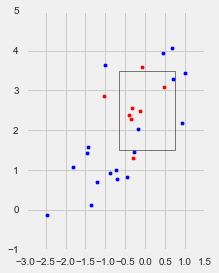

In [152]:
cal_pitcher_plots('Holman, Grant' , 'Slider')

# Pitching Scouting Report Visualizations

In [153]:
# Plot Spray Plot of Balls/Strikes for Opposing team for specified pitches
def pitcher_strike_plot(pitcher, pitch_type, team):
    team_pitchers = trackman[trackman['PitcherTeam']== team]
    
    
    pitcher_pitches = team_pitchers[team_pitchers["Pitcher"] == pitcher]
    pitcher_pitchtype = pitcher_pitches[pitcher_pitches["TaggedPitchType"]== pitch_type]
    
    balls = pitcher_pitchtype[pitcher_pitchtype["PitchCall"] == "BallCalled"]
    called_strikes = pitcher_pitchtype[pitcher_pitchtype["PitchCall"] == "StrikeCalled"]
    swinging_strikes =pitcher_pitchtype[pitcher_pitchtype["PitchCall"] == "StrikeSwinging"]
    
    plt.scatter(balls["PlateLocSide"], balls['PlateLocHeight'], c="b")
    plt.scatter(called_strikes["PlateLocSide"], called_strikes['PlateLocHeight'], c="r")
    plt.scatter(swinging_strikes["PlateLocSide"], swinging_strikes['PlateLocHeight'],c="r")
    
    plt.axes()
    rectangle = plt.Rectangle((-8/12,1.5), 17/12, 2, facecolor='none',ec="black")
    plt.gca().add_patch(rectangle)
    plt.axis('scaled')

    plt.show()

In [154]:
# Plots Spray Plot of Hits and Non-Hits (Red Denotes a hit, blue represents non-hit)
def pitcher_hit_plot(pitcher, pitch_type, team):
    team_pitchers = trackman[trackman['PitcherTeam']== team]
    
    
    pitcher_pitches = team_pitchers[team_pitchers["Pitcher"] == pitcher]
    pitcher_pitchtype = pitcher_pitches[pitcher_pitches["TaggedPitchType"]== pitch_type]
    
#     singles = pitcher_pitchtype[pitcher_pitchtype["PlayResult"] == "Single"]
#     doubles = pitcher_pitchtype[pitcher_pitchtype["PlayResult"] == "Double"]
#     trips =pitcher_pitchtype[pitcher_pitchtype["PlayResult"] == "Triple"]
#     homer = pitcher_pitchtype[pitcher_pitchtype["PlayResult"] == "HomeRun"]
    
    hit = pitcher_pitchtype[(pitcher_pitchtype["PlayResult"] == "Single") |
                            (pitcher_pitchtype["PlayResult"] =="HomeRun") |
                            (pitcher_pitchtype["PlayResult"] =="Double") |
                            (pitcher_pitchtype["PlayResult"] == "Triple")]
    nonhit = pitcher_pitchtype[(pitcher_pitchtype["PlayResult"] == "Undefined") | (pitcher_pitchtype["PlayResult"] == "Out")|
                               (pitcher_pitchtype["PlayResult"] == "Error") | (pitcher_pitchtype["PlayResult"] == "Sacrifice")]
    
    plt.scatter(nonhit["PlateLocSide"], nonhit['PlateLocHeight'], c="b")
    plt.scatter(hit["PlateLocSide"], hit['PlateLocHeight'], c="r")

    
    plt.axes()
    rectangle = plt.Rectangle((-8/12,1.5), 17/12, 2, facecolor='none',ec="black")
    plt.gca().add_patch(rectangle)
    plt.axis('scaled')

    plt.show()

/Users/tylernunez/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


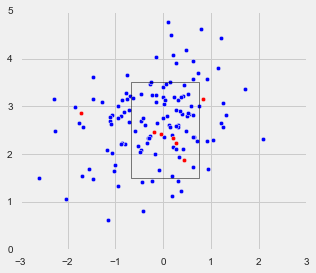

In [155]:
pitcher_hit_plot('Holman, Grant' , 'Fastball',"CAL_BEA")

## USF 2/26 Analysis

In [156]:
usf_pitchers = trackman[trackman['PitcherTeam']== 'SAN_DON']
df = usf_pitchers[["TaggedPitchType","AutoPitchType","Pitcher",'EffectiveVelo', "SpinRate"]]
df['TaggedPitchType'].replace('Undefined', np.NaN,inplace=True)
df.TaggedPitchType.fillna(df.AutoPitchType, inplace=True)
df1 = df[["Pitcher",'SpinRate','EffectiveVelo','TaggedPitchType']]

df1.head()

,Pitcher,SpinRate,EffectiveVelo,TaggedPitchType
158295,"Young, Grant",1616.841,78.29855,Fastball
158296,"Young, Grant",1265.168,70.92918,ChangeUp
158297,"Young, Grant",1607.139,77.28404,Fastball
158298,"Young, Grant",1671.900,78.87868,Fastball
158299,"Young, Grant",1078.225,70.22093,ChangeUp


In [157]:
df1.groupby(['TaggedPitchType',"Pitcher"]).mean()

SpinRate  EffectiveVelo
TaggedPitchType Pitcher                                     
ChangeUp        Barchus, Jordan   1368.487000      74.261450
                Koppelmaa, Kasey  1235.078400      68.952355
                Washburn, Julian  1663.830333      69.890490
                Young, Grant      1186.040684      68.961695
Curveball       Washburn, Julian  2018.090333      66.912880
                Young, Grant      1924.945000      54.420127
Fastball        Barchus, Jordan   1783.646556      79.285349
                Koppelmaa, Kasey  1867.206600      76.795772
                Mollerus, Josh    2199.926680      85.233626
                Post, Benji       1419.662286      77.403754
                Washburn, Julian  2065.017852      84.016149
                Young, Grant      1636.681500      77.310721
Slider          Barchus, Jordan   2431.644750      69.891565
                Koppelmaa, Kasey  2241.310500      70.451585
                Mollerus, Josh    1992.291500      71.976205
                Washburn, Julian  2084.591000      68.500980
                Young, Grant      2148.959727      61.740784

In [158]:
# Stoutenborough Pitch Mix
cal_pitchers = trackman[trackman['PitcherTeam']== 'CAL_BEA']
d = cal_pitchers[["TaggedPitchType","AutoPitchType","Pitcher",'EffectiveVelo', "SpinRate"]]
d['TaggedPitchType'].replace('Undefined', np.NaN,inplace=True)
d.TaggedPitchType.fillna(df.AutoPitchType, inplace=True)
df2 = d[["Pitcher",'SpinRate','EffectiveVelo','TaggedPitchType']]

stoutenborough = df2[df2["Pitcher"] == "Stoutenborough, Sam"]
stoutenborough.groupby(['TaggedPitchType',"Pitcher"]).mean()

,,SpinRate,EffectiveVelo
TaggedPitchType,Pitcher,,
ChangeUp,"Stoutenborough, Sam",1317.534292,77.875166
Curveball,"Stoutenborough, Sam",2308.773161,72.043740
Fastball,"Stoutenborough, Sam",2057.060798,85.696572
Sinker,"Stoutenborough, Sam",2034.392947,84.800791
Slider,"Stoutenborough, Sam",2158.061271,75.448302
